In [1]:
# 加载 Python 依赖
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "svg"

import tensorflow as tf
from tensorflow.keras import models, layers
print(f"tf.__version__ = {tf.__version__}")

from tfkeras.utils.plot_metrics import plot_metrics

tf.__version__ = 2.8.0


In [2]:
# 数据读取和查看
df_train_raw = pd.read_csv("./data/titanic/train.csv")
df_test_raw = pd.read_csv("./data/titanic/test.csv")
df_train_raw.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
5,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
6,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
7,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
8,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
9,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S


In [3]:
# 数据预处理
def preprocessing(dfdata):

    dfresult= pd.DataFrame()

    #Pclass
    dfPclass = pd.get_dummies(dfdata['Pclass'])
    dfPclass.columns = ['Pclass_' +str(x) for x in dfPclass.columns ]
    dfresult = pd.concat([dfresult,dfPclass],axis = 1)

    #Sex
    dfSex = pd.get_dummies(dfdata['Sex'])
    dfresult = pd.concat([dfresult,dfSex],axis = 1)

    #Age
    dfresult['Age'] = dfdata['Age'].fillna(0)
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')

    #SibSp,Parch,Fare
    dfresult['SibSp'] = dfdata['SibSp']
    dfresult['Parch'] = dfdata['Parch']
    dfresult['Fare'] = dfdata['Fare']

    #Carbin
    dfresult['Cabin_null'] =  pd.isna(dfdata['Cabin']).astype('int32')

    #Embarked
    dfEmbarked = pd.get_dummies(dfdata['Embarked'],dummy_na=True)
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]
    dfresult = pd.concat([dfresult,dfEmbarked],axis = 1)

    return(dfresult)

x_train = preprocessing(df_train_raw)
y_train = df_train_raw['Survived'].values

x_test = preprocessing(df_test_raw)
y_test = df_test_raw['Survived'].values

print(f"x_train.shape = {x_train.shape}")
print(f"x_test.shape = {x_test.shape}")

x_train.shape = (712, 15)
x_test.shape = (179, 15)


In [4]:
# 定义模型
tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(20, activation = "relu", input_shape = (15,)))
model.add(layers.Dense(10, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                320       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 模型训练
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["AUC"],
)
history = model.fit(
    x_train, 
    y_train,
    batch_size = 64,
    epochs = 30,
    validation_split = 0.2,
)

Epoch 1/30
9/9 [==============================] - 1s 27ms/step - loss: 1.1033 - auc: 0.4437 - val_loss: 0.9935 - val_auc: 0.5460
Epoch 2/30
9/9 [==============================] - 0s 3ms/step - loss: 0.8367 - auc: 0.5805 - val_loss: 0.6691 - val_auc: 0.6360
Epoch 3/30
9/9 [==============================] - 0s 3ms/step - loss: 0.7112 - auc: 0.6678 - val_loss: 0.6172 - val_auc: 0.6990
Epoch 4/30
9/9 [==============================] - 0s 3ms/step - loss: 0.6643 - auc: 0.7167 - val_loss: 0.6009 - val_auc: 0.7014
Epoch 5/30
9/9 [==============================] - 0s 3ms/step - loss: 0.6356 - auc: 0.7106 - val_loss: 0.5994 - val_auc: 0.6951
Epoch 6/30
9/9 [==============================] - 0s 3ms/step - loss: 0.6160 - auc: 0.7164 - val_loss: 0.6011 - val_auc: 0.6966
Epoch 7/30
9/9 [==============================] - 0s 3ms/step - loss: 0.6102 - auc: 0.7226 - val_loss: 0.5946 - val_auc: 0.7020
Epoch 8/30
9/9 [==============================] - 0s 3ms/step - loss: 0.6056 - auc: 0.7234 - val_loss: 

In [11]:
# 评估模型
history_df = pd.DataFrame(history.history)
history_df.rename(columns = {
    "loss": "train_loss",
    "auc": "train_auc",
}, inplace = True)
history_df

,train_loss,train_auc,val_loss,val_auc
0,1.103314,0.443738,0.993480,0.546045
1,0.836744,0.580473,0.669076,0.636004
2,0.711209,0.667772,0.617209,0.698986
3,0.664349,0.716700,0.600851,0.701420
4,0.635560,0.710589,0.599392,0.695132
5,0.615984,0.716362,0.601107,0.696552
6,0.610165,0.722584,0.594633,0.702028
7,0.605638,0.723351,0.595160,0.701217
8,0.600835,0.728526,0.591223,0.705477
9,0.599645,0.731914,0.590082,0.708418


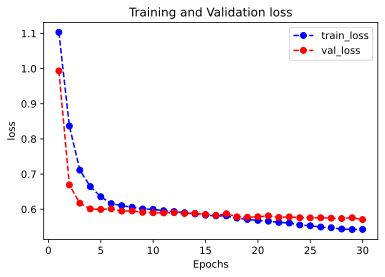

In [13]:
plot_metrics(history_df, "loss")

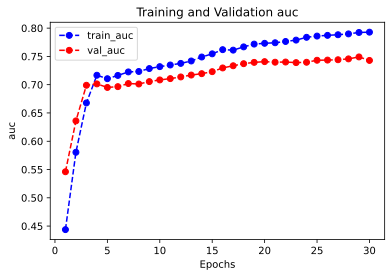

In [15]:
plot_metrics(history_df, "auc")

In [16]:
model.evaluate(x = x_test, y = y_test)

6/6 [==============================] - 0s 989us/step - loss: 0.5349 - auc: 0.7699


[0.5348910093307495, 0.769909679889679]

In [18]:
# 使用模型
## 预测概率
model.predict(x_test[0:10])

array([[0.30473965],
       [0.33808535],
       [0.4356234 ],
       [0.96742195],
       [0.5558063 ],
       [0.34179097],
       [0.30398178],
       [0.69793916],
       [0.4650855 ],
       [0.24286163]], dtype=float32)

In [1]:
## 预测类别
# model.predict_classes(x_test[0:10])